Mean                 : 38.597772
Standard Deviation   : 12.744605811255312
Median               : 38.03365
Mode                 : 57.8837
Variance             : 162.42497728428268
Range                : 80.9345
Q1                   : 30.155625
Q3                   : 46.198750000000004
IQR                  : 16.043125000000003
Upper Bound          : 70.26343750000001
Lower Bound          : 6.0909374999999955
Bin Width            : 4.793049101640663
Number of Bins       : 17


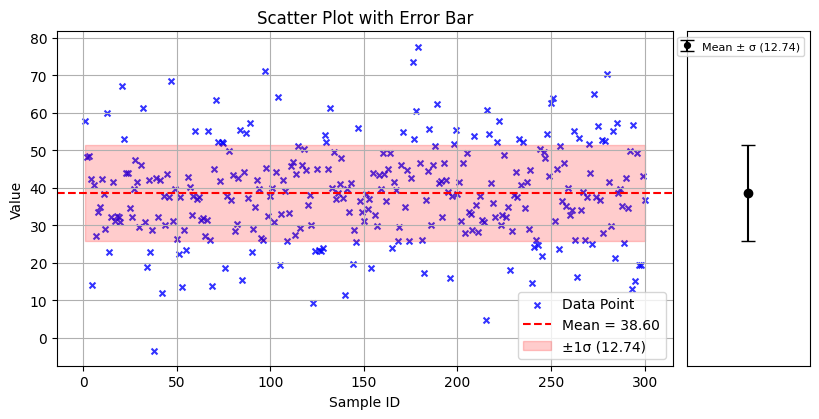

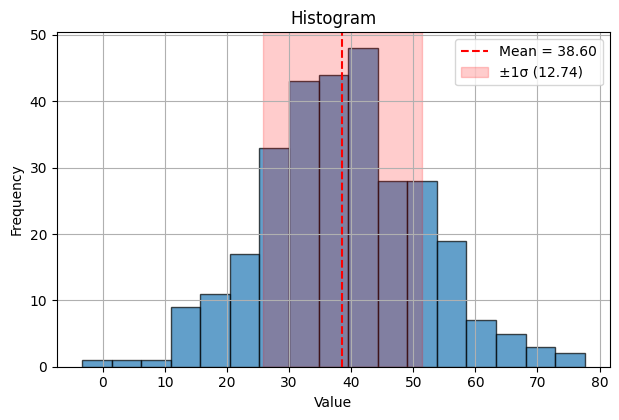

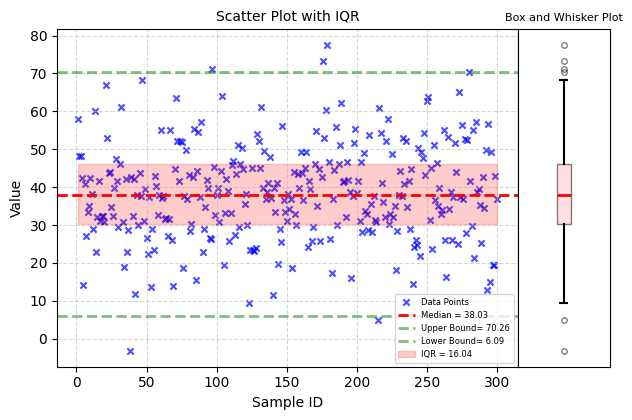

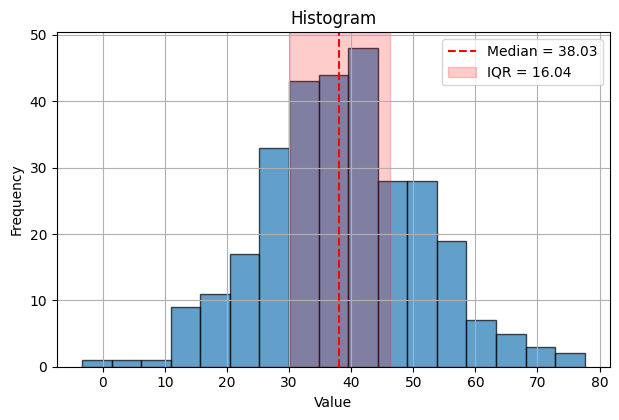

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("geostat.csv")
data = df['value']
data_sorted = sorted(data)

sample_id = np.arange(1, len(data) + 1)
mean = np.mean(data)
std_dev = np.std(data)
median = np.median(data_sorted)
mode = stats.mode(data, keepdims=True).mode[0]
variance = np.var(data)
range = max(data) - min(data)
q1 = np.percentile(data_sorted, 25)
q3 = np.percentile(data_sorted, 75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

bin_width = 2*(q3 - q1) / (len(data_sorted) ** (1/3))
num_bin = int(np.ceil(((max(data_sorted) - min(data_sorted)) / bin_width)))

print("Mean                 :", mean)
print("Standard Deviation   :", std_dev)
print("Median               :", median)
print("Mode                 :", mode)
print("Variance             :", variance)
print("Range                :", range)
print("Q1                   :", q1)
print("Q3                   :", q3)
print("IQR                  :", iqr)
print("Upper Bound          :", upper_bound)
print("Lower Bound          :", lower_bound)
print("Bin Width            :", bin_width)
print("Number of Bins       :", num_bin)

# Plot scatter plot with error bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios':[3.5, 0.7]})
ax1.scatter(sample_id, data, color='blue', label="Data Point", marker='x', alpha=0.8, s=18)
ax1.axhline(mean, color='red', linestyle='dashed', label=f"Mean = {mean:.2f}")
ax1.fill_between(sample_id, mean - std_dev, mean + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")
ax1.set_xlabel("Sample ID")
ax1.set_ylabel("Value")
ax1.set_title("Scatter Plot with Error Bar")
ax1.legend()
ax1.grid(True)
plt.tight_layout(pad=0)

# Error bar 
ax2.errorbar(len(data) + 5, mean, yerr=std_dev, fmt='o', color='black', capsize=5, label=f"Mean ± σ ({std_dev:.2f})")
ax2.set_xticks([])  # untuk menghilangkan angka sb x
ax2.set_yticks([])  # untuk menghilangkan angka sb y
ax2.set_ylim(ax1.get_ylim())  
ax2.legend(fontsize=8, markerscale=0.7, handlelength=1)
plt.tight_layout(pad=0)

# Plot Histogram with Mean
fig, ax3 = plt.subplots(1, 1, figsize=(6, 4))
ax3.hist(data, bins=num_bin, edgecolor='black', alpha=0.7)
ax3.axvline(mean, color='red', linestyle='dashed', label=f"Mean = {mean:.2f}")
ax3.axvspan(mean - std_dev, mean + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")
ax3.set_xlabel("Value")
ax3.set_ylabel("Frequency") 
ax3.set_title("Histogram")
ax3.grid(True)
ax3.legend()
plt.tight_layout(pad=0)

# Plot Scatter with Box and Whishker Plot
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(6, 4), gridspec_kw={'width_ratios': [3.5, 0.7]})
ax4.scatter(sample_id, data, color='blue', label="Data Points", marker='x', alpha=0.7, s=20)
ax4.axhline(median, color='red', linestyle='dashed', linewidth=2, label=f"Median = {median:.2f}")
ax4.axhline(upper_bound, color='green', linestyle='dashed', linewidth=2, label=f"Upper Bound= {upper_bound:.2f}", alpha = 0.5)
ax4.axhline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f"Lower Bound= {lower_bound:.2f}", alpha = 0.5)
ax4.fill_between(sample_id, q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr:.2f}")
ax4.set_xlabel("Sample ID")
ax4.set_ylabel("Value")
ax4.set_title("Scatter Plot with IQR", fontsize=10)
ax4.legend(fontsize=6, loc='best')
ax4.grid(True, linestyle="--", alpha=0.5)

# BOx and Whisker Plot
ax5.boxplot(data, vert=True, patch_artist=True,
            boxprops=dict(facecolor='pink', alpha=0.5),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', color='black', alpha=0.5, markersize=4))
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_title("Box and Whisker Plot", fontsize=8)
ax5.set_ylim(ax4.get_ylim())
plt.tight_layout(pad=0)

# Plot Histrogram with IQR
fig, ax6 = plt.subplots(1, 1, figsize=(6, 4))
ax6.hist(data, bins=num_bin, edgecolor='black', alpha=0.7)
ax6.axvline(median, color='red', linestyle='dashed', label=f"Median = {median:.2f}")
ax6.axvspan(q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr:.2f}")
ax6.set_xlabel("Value")
ax6.set_ylabel("Frequency") 
ax6.set_title("Histogram")
ax6.grid(True)
ax6.legend()

plt.tight_layout(pad=0)
plt.show()

Mean                 : 38.597772
Standard Deviation   : 12.744605811255312
Median               : 38.03365
Mode                 : 57.8837
Variance             : 162.42497728428268
Range                : 80.9345
Q1                   : 30.155625
Q3                   : 46.198750000000004
IQR                  : 16.043125000000003
Upper Bound          : 70.26343750000001
Lower Bound          : 6.0909374999999955
Bin Width            : 4.793049101640663
Number of Bins       : 17


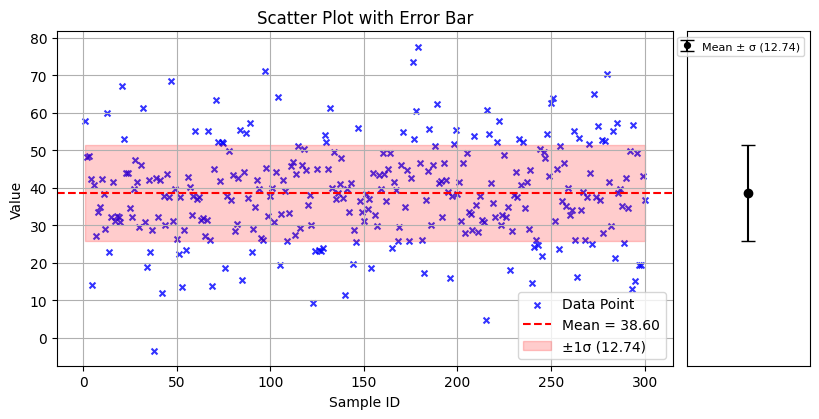

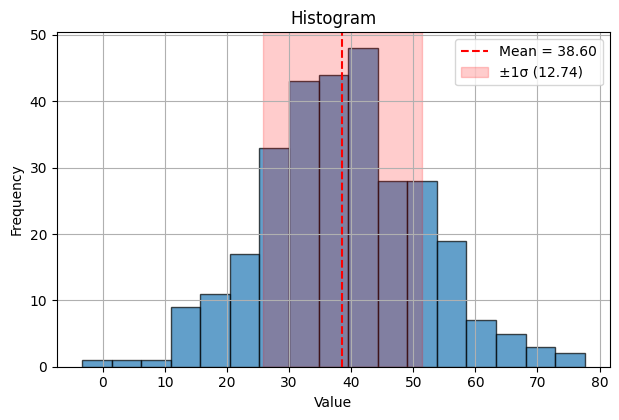

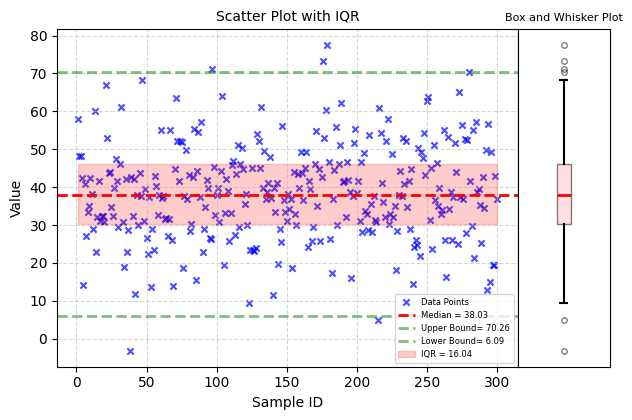

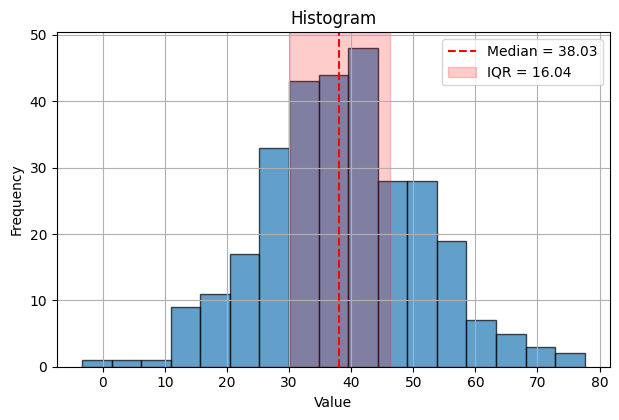

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("geostat.csv")
data = df['value']
data_sorted = sorted(data)

sample_id = np.arange(1, len(data) + 1)
mean = np.mean(data)
std_dev = np.std(data)
median = np.median(data_sorted)
mode = stats.mode(data, keepdims=True).mode[0]
variance = np.var(data)
range = max(data) - min(data)
q1 = np.percentile(data_sorted, 25)
q3 = np.percentile(data_sorted, 75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

bin_width = 2*(q3 - q1) / (len(data_sorted) ** (1/3))
num_bin = int(np.ceil(((max(data_sorted) - min(data_sorted)) / bin_width)))

print("Mean                 :", mean)
print("Standard Deviation   :", std_dev)
print("Median               :", median)
print("Mode                 :", mode)
print("Variance             :", variance)
print("Range                :", range)
print("Q1                   :", q1)
print("Q3                   :", q3)
print("IQR                  :", iqr)
print("Upper Bound          :", upper_bound)
print("Lower Bound          :", lower_bound)
print("Bin Width            :", bin_width)
print("Number of Bins       :", num_bin)

# Plot scatter plot with error bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios':[3.5, 0.7]})
ax1.scatter(sample_id, data, color='blue', label="Data Point", marker='x', alpha=0.8, s=18)
ax1.axhline(mean, color='red', linestyle='dashed', label=f"Mean = {mean:.2f}")
ax1.fill_between(sample_id, mean - std_dev, mean + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")
ax1.set_xlabel("Sample ID")
ax1.set_ylabel("Value")
ax1.set_title("Scatter Plot with Error Bar")
ax1.legend()
ax1.grid(True)
plt.tight_layout(pad=0)

# Error bar 
ax2.errorbar(len(data) + 5, mean, yerr=std_dev, fmt='o', color='black', capsize=5, label=f"Mean ± σ ({std_dev:.2f})")
ax2.set_xticks([])  # untuk menghilangkan angka sb x
ax2.set_yticks([])  # untuk menghilangkan angka sb y
ax2.set_ylim(ax1.get_ylim())  
ax2.legend(fontsize=8, markerscale=0.7, handlelength=1)
plt.tight_layout(pad=0)

# Plot Histogram with Mean
fig, ax3 = plt.subplots(1, 1, figsize=(6, 4))
ax3.hist(data, bins=num_bin, edgecolor='black', alpha=0.7)
ax3.axvline(mean, color='red', linestyle='dashed', label=f"Mean = {mean:.2f}")
ax3.axvspan(mean - std_dev, mean + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")
ax3.set_xlabel("Value")
ax3.set_ylabel("Frequency") 
ax3.set_title("Histogram")
ax3.grid(True)
ax3.legend()
plt.tight_layout(pad=0)

# Plot Scatter with Box and Whishker Plot
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(6, 4), gridspec_kw={'width_ratios': [3.5, 0.7]})
ax4.scatter(sample_id, data, color='blue', label="Data Points", marker='x', alpha=0.7, s=20)
ax4.axhline(median, color='red', linestyle='dashed', linewidth=2, label=f"Median = {median:.2f}")
ax4.axhline(upper_bound, color='green', linestyle='dashed', linewidth=2, label=f"Upper Bound= {upper_bound:.2f}", alpha = 0.5)
ax4.axhline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f"Lower Bound= {lower_bound:.2f}", alpha = 0.5)
ax4.fill_between(sample_id, q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr:.2f}")
ax4.set_xlabel("Sample ID")
ax4.set_ylabel("Value")
ax4.set_title("Scatter Plot with IQR", fontsize=10)
ax4.legend(fontsize=6, loc='best')
ax4.grid(True, linestyle="--", alpha=0.5)

# BOx and Whisker Plot
ax5.boxplot(data, vert=True, patch_artist=True,
            boxprops=dict(facecolor='pink', alpha=0.5),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', color='black', alpha=0.5, markersize=4))
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_title("Box and Whisker Plot", fontsize=8)
ax5.set_ylim(ax4.get_ylim())
plt.tight_layout(pad=0)

# Plot Histrogram with IQR
fig, ax6 = plt.subplots(1, 1, figsize=(6, 4))
ax6.hist(data, bins=num_bin, edgecolor='black', alpha=0.7)
ax6.axvline(median, color='red', linestyle='dashed', label=f"Median = {median:.2f}")
ax6.axvspan(q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr:.2f}")
ax6.set_xlabel("Value")
ax6.set_ylabel("Frequency") 
ax6.set_title("Histogram")
ax6.grid(True)
ax6.legend()

plt.tight_layout(pad=0)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'geostat2.csv'